In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('tested.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Exploratory Data Analysis
#### 0= dead , 1=alive
#### 1=firstclass, 2=2nd class , 3= 3rd class
#### The “Embarked”indicates the port where passengers got on board the Titanic. Here’s what each value represents:
#### C = Cherbourg: A city in northern France.
#### Q = Queenstown (now known as Cobh): A town in County Cork, Ireland.
#### S = Southampton: A city on the south coast of England.

# EXPLORATORY DATA ANALYSIS 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
def summary(df):
    sum = pd.DataFrame(df.dtypes, columns=['dtypes'])
    sum['missing#'] = df.isna().sum().values
    sum['missing%'] = (df.isna().sum().values*100)/len(df)
    sum['uniques'] = df.nunique().values
    sum['count'] = df.count().values
    #sum['skew'] = df.skew().values
    desc = pd.DataFrame(df.describe().T)
    sum['min'] = desc['min']
    sum['max'] = desc['max']
    sum['mean'] = desc['mean']
    return sum

summary(df).style.background_gradient(cmap='twilight_shifted_r')

,dtypes,missing#,missing%,uniques,count,min,max,mean
PassengerId,int64,0,0.000000,418,418,892.000000,1309.000000,1100.500000
Survived,int64,0,0.000000,2,418,0.000000,1.000000,0.363636
Pclass,int64,0,0.000000,3,418,1.000000,3.000000,2.265550
Name,object,0,0.000000,418,418,nan,nan,nan
Sex,object,0,0.000000,2,418,nan,nan,nan
Age,float64,86,20.574163,79,332,0.170000,76.000000,30.272590
SibSp,int64,0,0.000000,7,418,0.000000,8.000000,0.447368
Parch,int64,0,0.000000,8,418,0.000000,9.000000,0.392344
Ticket,object,0,0.000000,363,418,nan,nan,nan
Fare,float64,1,0.239234,169,417,0.000000,512.329200,35.627188


In [6]:
df.shape

(418, 12)

#### We drop the cabin values since it has a lot of null values

In [7]:
df.drop(columns=['Cabin'], inplace=True)

In [8]:
summary(df).style.background_gradient(cmap='twilight_shifted_r')

,dtypes,missing#,missing%,uniques,count,min,max,mean
PassengerId,int64,0,0.000000,418,418,892.000000,1309.000000,1100.500000
Survived,int64,0,0.000000,2,418,0.000000,1.000000,0.363636
Pclass,int64,0,0.000000,3,418,1.000000,3.000000,2.265550
Name,object,0,0.000000,418,418,nan,nan,nan
Sex,object,0,0.000000,2,418,nan,nan,nan
Age,float64,86,20.574163,79,332,0.170000,76.000000,30.272590
SibSp,int64,0,0.000000,7,418,0.000000,8.000000,0.447368
Parch,int64,0,0.000000,8,418,0.000000,9.000000,0.392344
Ticket,object,0,0.000000,363,418,nan,nan,nan
Fare,float64,1,0.239234,169,417,0.000000,512.329200,35.627188


#### We use fillna method to fill the null values in Fare and Age columns using mean fill

In [9]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [10]:
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

In [11]:
summary(df).style.background_gradient(cmap='twilight_shifted_r')

,dtypes,missing#,missing%,uniques,count,min,max,mean
PassengerId,int64,0,0.000000,418,418,892.000000,1309.000000,1100.500000
Survived,int64,0,0.000000,2,418,0.000000,1.000000,0.363636
Pclass,int64,0,0.000000,3,418,1.000000,3.000000,2.265550
Name,object,0,0.000000,418,418,nan,nan,nan
Sex,object,0,0.000000,2,418,nan,nan,nan
Age,float64,0,0.000000,80,418,0.170000,76.000000,30.272590
SibSp,int64,0,0.000000,7,418,0.000000,8.000000,0.447368
Parch,int64,0,0.000000,8,418,0.000000,9.000000,0.392344
Ticket,object,0,0.000000,363,418,nan,nan,nan
Fare,float64,0,0.000000,170,418,0.000000,512.329200,35.627188


In [12]:
df['Ticket'].sample(10)

164                237393
213                 24065
73               PC 17562
306                113781
200                 36568
194                 28220
272                 13508
24               PC 17608
6                  330972
415    SOTON/O.Q. 3101262
Name: Ticket, dtype: object

In [13]:
df.drop(columns=['Ticket'], inplace=True)

#### We also drop the ticket column

In [14]:
summary(df).style.background_gradient(cmap='twilight_shifted_r')

,dtypes,missing#,missing%,uniques,count,min,max,mean
PassengerId,int64,0,0.000000,418,418,892.000000,1309.000000,1100.500000
Survived,int64,0,0.000000,2,418,0.000000,1.000000,0.363636
Pclass,int64,0,0.000000,3,418,1.000000,3.000000,2.265550
Name,object,0,0.000000,418,418,nan,nan,nan
Sex,object,0,0.000000,2,418,nan,nan,nan
Age,float64,0,0.000000,80,418,0.170000,76.000000,30.272590
SibSp,int64,0,0.000000,7,418,0.000000,8.000000,0.447368
Parch,int64,0,0.000000,8,418,0.000000,9.000000,0.392344
Fare,float64,0,0.000000,170,418,0.000000,512.329200,35.627188
Embarked,object,0,0.000000,3,418,nan,nan,nan


# DATA VISUVALIZATION

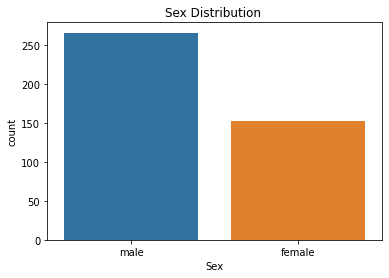

In [15]:
sns.countplot(x='Sex',data=df)
plt.title('Sex Distribution ')
plt.show()

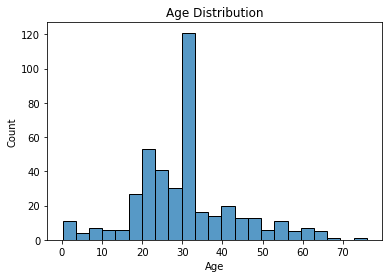

In [16]:
sns.histplot(df['Age'])
plt.title('Age Distribution')
plt.show()

<AxesSubplot:xlabel='Embarked', ylabel='count'>

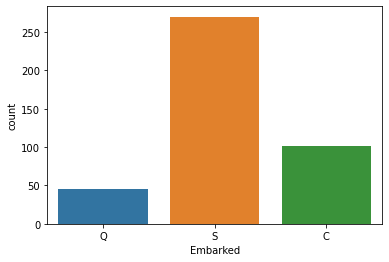

In [17]:
sns.countplot(x=df['Embarked'])

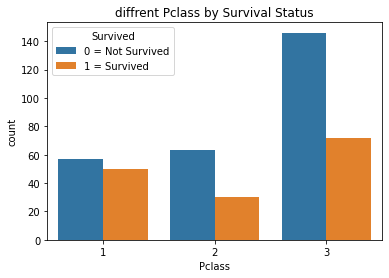

In [18]:
sns.countplot(x='Pclass',data=df,hue='Survived')
legend_labels = {0: 'Not Survived', 1: 'Survived'}
plt.legend(title='Survived', labels=[f"{key} = {value}" for key, value in legend_labels.items()])
plt.title('diffrent Pclass by Survival Status')
plt.show()

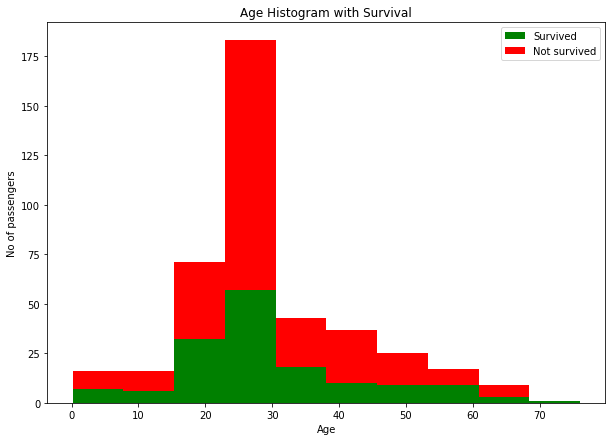

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))
plt.hist(x = [df[df['Survived']==1]['Age'], df[df['Survived']==0]['Age']],stacked=True, color = ['g','r'],label = ['Survived','Not survived'])
plt.title('Age Histogram with Survival')
plt.xlabel('Age')
plt.ylabel('No of passengers')
plt.legend()

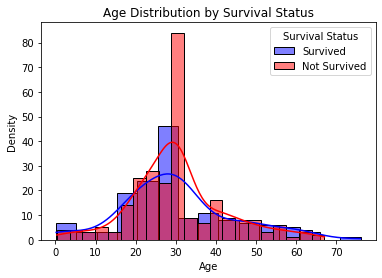

In [20]:
# Create a distribution plot for passengers who survived
sns.histplot(data=df[df['Survived'] == 1], x='Age', kde=True, color='blue', label='Survived')

# Create a distribution plot for passengers who did not survive
sns.histplot(data=df[df['Survived'] == 0], x='Age', kde=True, color='red', label='Not Survived')

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution by Survival Status')

# Add a legend
plt.legend(title='Survival Status')

plt.show()

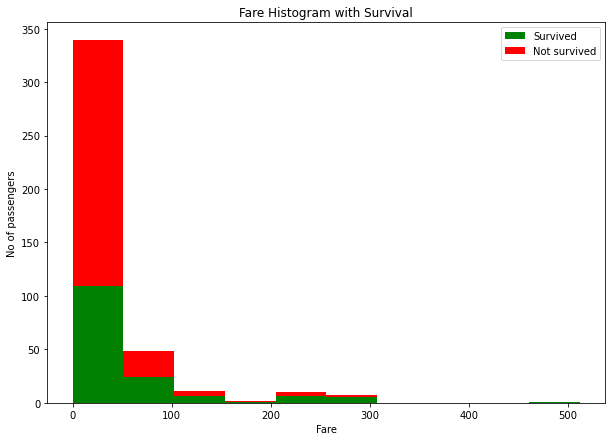

In [21]:
fig = plt.figure(figsize =(10, 7))
plt.hist(x = [df[df['Survived']==1]['Fare'], df[df['Survived']==0]['Fare']], stacked=True, color = ['g','r'],label = ['Survived','Not survived'])
plt.title('Fare Histogram with Survival')
plt.xlabel('Fare')
plt.ylabel('No of passengers')
plt.legend()

<AxesSubplot:xlabel='Embarked', ylabel='count'>

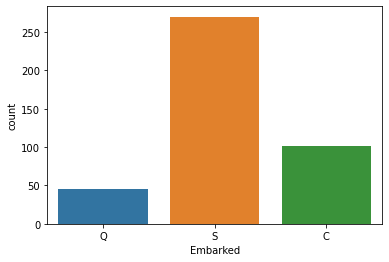

In [22]:
sns.countplot(x=df['Embarked'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


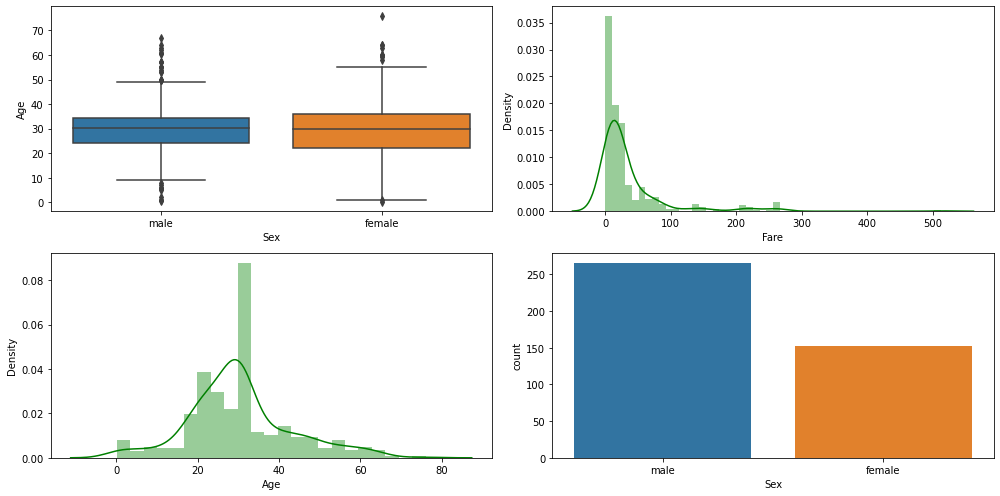

In [23]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
sns.boxplot(x='Sex', y = 'Age',data= df)

plt.subplot(2,2,2)
sns.distplot(df['Fare'],color='g')

plt.subplot(2,2,3)
sns.distplot(df['Age'],color='g')

plt.subplot(2,2,4)
sns.countplot(x='Sex', data=df)

plt.tight_layout()
plt.show()

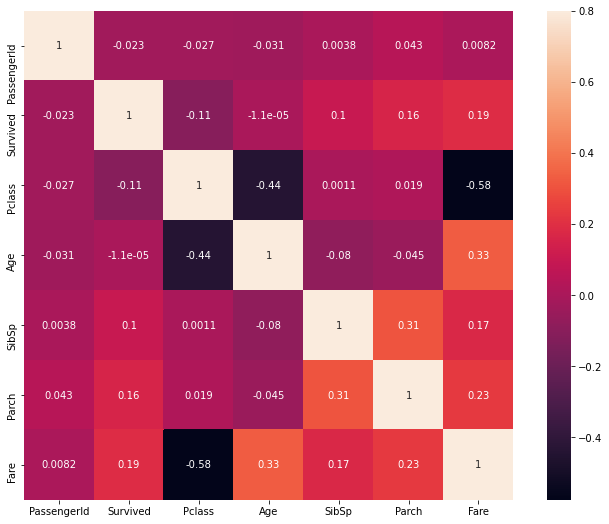

In [24]:
# Heatmap
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True, annot = True)
plt.show()

<AxesSubplot:xlabel='SibSp', ylabel='count'>

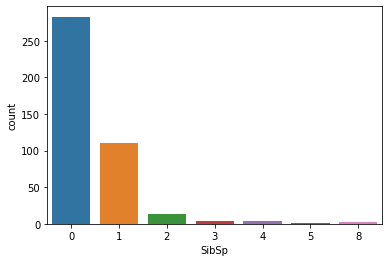

In [25]:
sns.countplot(x='SibSp',data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

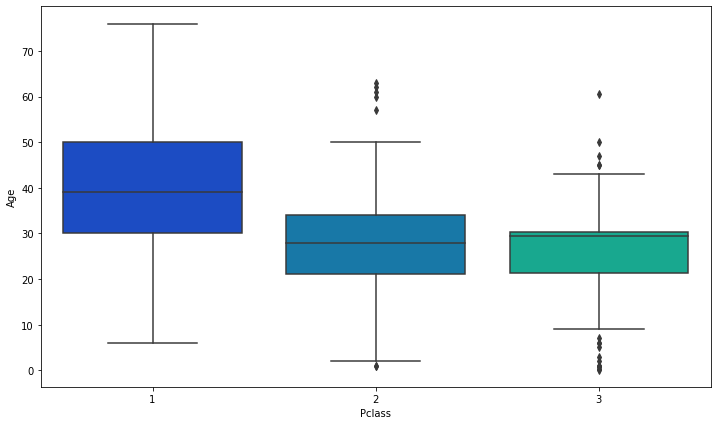

In [26]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

# CHANGE DATA TYPES OF COLUMN

In [27]:
df['Age'] = df['Age'].astype(int)
df['Fare'] = df['Fare'].astype(int)

In [28]:
# asign values to object using dictionary
df['Embarked'] = df['Embarked'].map({'Q': 0,'S':1,'C':2}).astype(int)
df['Sex'] = df['Sex'].map( {'female': 1,'male':0}).astype(int)

In [29]:
#drop columns for using dataset
dfn = df.drop(['PassengerId','Name'],axis = 1, inplace= True)

# MODEL BUILDING

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [31]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34,0,0,7,0
1,1,3,1,47,1,0,7,1
2,0,2,0,62,0,0,9,0
3,0,3,0,27,0,0,8,1
4,1,3,1,22,1,1,12,1


## - Decision Tree Accuracy

In [32]:
x= df.drop(['Survived'],axis=1)
y= df['Survived']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [33]:
from sklearn.metrics import accuracy_score
#prediction on test data
y_pred = clf.predict(x_test)
#calculation
acc = accuracy_score(y_test,y_pred)
print('Accuracy:', acc)

Accuracy: 1.0


## - Logistic Regression Accuracy

In [34]:
LR = LogisticRegression(solver='liblinear', max_iter=200)
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic regression accuracy: {:.2f}%'.format(LRAcc*100))

Logistic regression accuracy: 100.00%


## - Each Model Accuracy

In [38]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Neural Network': MLPClassifier(max_iter=1000)  
}

In [39]:
# Train and evaluate each model
for model_name, model in models.items():
    model.fit(x_train, y_train)
    Y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, Y_pred)
    report = classification_report(y_test, Y_pred)  # Compute classification report
    print(f"{model_name} - Accuracy: {accuracy:.2f}")
    print(f"Classification Report:\n{report}\n")

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84


Decision Tree - Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84


Random Forest - Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy